In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
from datetime import datetime
import shap
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve,make_scorer,precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve,
                             average_precision_score, f1_score)

# imbalanced-learn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_validate,RandomizedSearchCV


In [2]:
df = pd.read_csv("D:/Data Science/CreditCardFraud/data/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
#KEY EDA STEPS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#Class Imbalance
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [11]:
# Fraction of frauds
n_total = len(df)
n_frauds = df['Class'].sum()
print(f"{n_frauds} frauds out of {n_total} transactions ({n_frauds/n_total:.6f})")

492 frauds out of 284807 transactions (0.001727)


Text(0.5, 1.0, 'Amount distribution (long tail)')

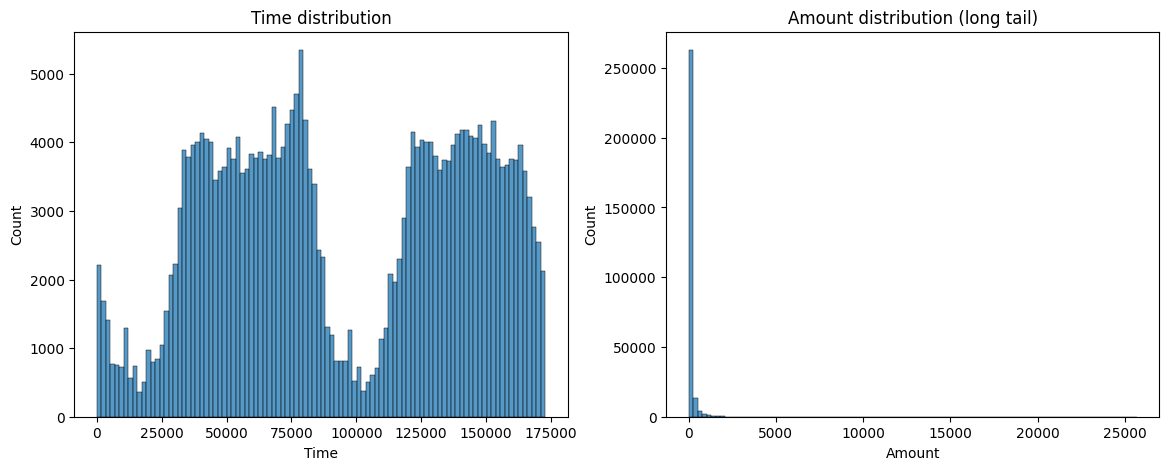

In [12]:
# Histograms of Time & Amount
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.histplot(df['Time'], ax=axes[0], bins=100)
axes[0].set_title('Time distribution')
sns.histplot(df['Amount'], ax=axes[1], bins=100)
axes[1].set_title('Amount distribution (long tail)')

Text(0.5, 1.0, 'Amount by Class (log scale)')

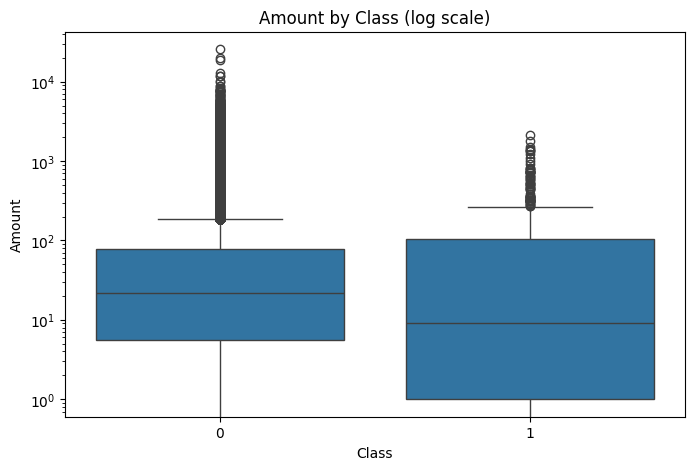

In [13]:
# Boxplot/violin of Amount by Class
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')  # useful because Amount has outliers
plt.title('Amount by Class (log scale)')

Text(0.5, 1.0, 'Correlation matrix')

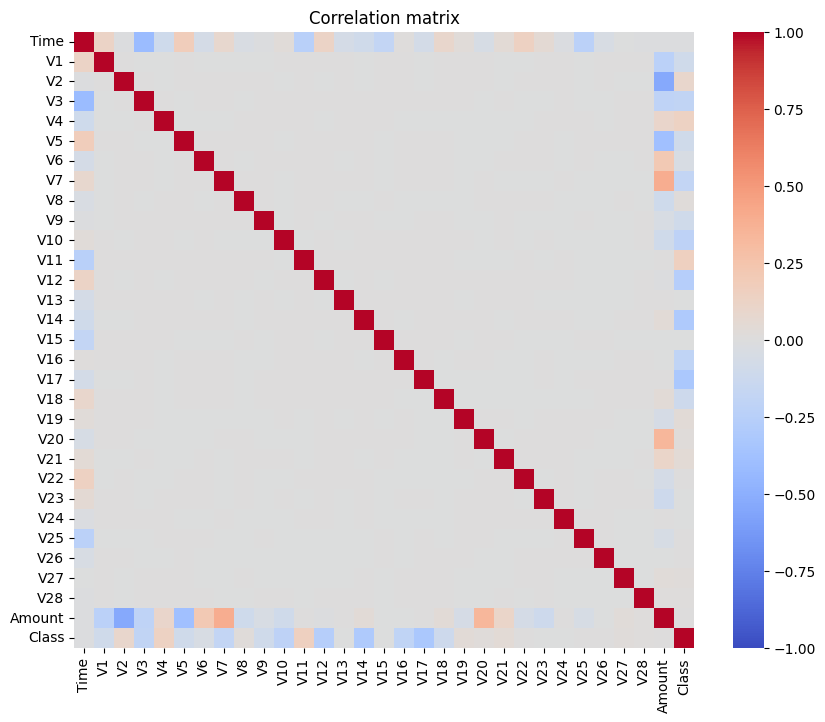

In [14]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')


In [5]:
#FEATURE ENGINEERING AND PRE-PROCESSING
#create features
df2 = df.copy()
# Make sure Time column is numeric
df2['Time'] = pd.to_numeric(df2['Time'], errors='coerce')
# convert Time (seconds) -> hour of day (assuming data covers consecutive seconds)



df2['hour'] = (df2['Time'] // 3600) % 24
df2['minutes'] = (df2['Time'] // 60) % 60

# log transform amount for another feature

df2['log_amount'] = np.log1p(df2['Amount'])

# Make sure new features are numeric
df2['hour'] = pd.to_numeric(df2['hour'], errors='coerce')
df2['minutes'] = pd.to_numeric(df2['minutes'], errors='coerce')
df2['log_amount'] = pd.to_numeric(df2['log_amount'], errors='coerce')

#Feature list
features = [c for c in df2.columns if c not in ['Class','Time']]
X = df2[features].copy()
y = df2['Class'].copy()

# quick sanity checks
print("Dataset shape:", df2.shape)
print("Feature count:", len(features))
print("Some columns:", features[:8], "...")
print("Class distribution:\n", y.value_counts(normalize=True))


# split (stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# ensure y_train is 1d
y_train = y_train.squeeze()


# === Scaling ===
# Choose scaler: StandardScaler (better after log transform), RobustScaler (if raw Amount)
scaler = StandardScaler()

# Columns we want to scale explicitly
scale_cols = ['Amount', 'log_amount', 'hour', 'minutes']

# Fit on train, transform both train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

print("Scaled features preview (X_train_scaled):")
print(X_train_scaled[scale_cols].head())



Dataset shape: (284807, 34)
Feature count: 32
Some columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'] ...
Class distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
Scaled features preview (X_train_scaled):
          Amount  log_amount      hour   minutes
265518 -0.322494   -0.624639  1.020452  1.665958
180305 -0.339764   -1.068403 -0.694601  0.287492
42664   0.346693    1.218601 -0.523095 -0.171997
198723 -0.327360   -0.720392 -0.351590  1.206469
82325  -0.008281    0.793481  0.334431  0.000311


In [4]:
# Building Reusable Pre-processing pipeline

#Handle outliers (RobustScaler).

#Handle class imbalance (SMOTE).

#Build a reliable fraud detection model (XGBoost).

#Wrap it all in a pipeline so the same steps are applied consistently in training & testing.

#In short: We want a fair, balanced, and powerful fraud detection system that doesn’t cheat and is easy to reuse.

#Create numeric features
numeric_features = [c for c in X.columns if str(c).startswith('V')] + [
    'Amount', 'log_amount', 'hour', 'minutes'
]

#Robust scaler handle outliers

numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])



#Now apply the scaler or numeric transformer on numeric features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='drop'  # drop any columns not listed above
)
   

# quick test transform to ensure no errors
Xt = preprocessor.fit_transform(X_train)
print("Preprocessed training array type/shape:", type(Xt), Xt.shape)


#Now do oversampling to create balanced between fraud and non fraud cases and fraud is in minority by using SMOTE

clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
print("Using XGBoost classifier.")


# -------------------------
# 5) Pipelines
# -------------------------
# main pipeline: preproc -> SMOTE -> classifier
pipeline = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', clf)
])




Preprocessed training array type/shape: <class 'numpy.ndarray'> (227845, 32)
Using XGBoost classifier.


In [6]:
#Baseline model: Logistic Regression
#Start with a simple baseline (fast to run). Evaluate with cross-validation using StratifiedKFold.

lr = LogisticRegression(max_iter=1000, class_weight = 'balanced', random_state=42)
#again pass data through pipeline

pipeline_lr = ImbPipeline(steps = [
    ('preproc', preprocessor),
   ('smote', SMOTE(random_state=42)),
    ('lr', lr)
])

#Now do cross validation through stratiied kfold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define metrics to compute
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}
# Evaluate baseline logistic regression pipeline
print("\nRunning CV for Logistic Regression + SMOTE...")


# Run cross-validation
scores_lr = cross_validate(pipeline_lr, X_train, y_train, cv=cv,
                        scoring=scoring, return_train_score=False)

# Print average results
for metric in scoring.keys():
    print(f"LR {metric}: {scores_lr['test_' + metric].mean():.4f} (std {scores_lr['test_' + metric].std():.4f})")


# Evaluate strong classifier pipeline (XGB)
print("\nRunning CV for strong classifier + SMOTE...")
scores_clf = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
for metric in scoring.keys():
    print(f"Model {metric}: {scores_clf['test_' + metric].mean():.4f} (std {scores_clf['test_' + metric].std():.4f})")



Running CV for Logistic Regression + SMOTE...
LR precision: 0.0573 (std 0.0017)
LR recall: 0.8986 (std 0.0287)
LR f1: 0.1077 (std 0.0028)
LR roc_auc: 0.9800 (std 0.0113)

Running CV for strong classifier + SMOTE...
Model precision: 0.7968 (std 0.0396)
Model recall: 0.8300 (std 0.0305)
Model f1: 0.8118 (std 0.0160)
Model roc_auc: 0.9809 (std 0.0080)



Test set classification report (threshold=0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.88      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Test ROC-AUC: 0.9842734329240982


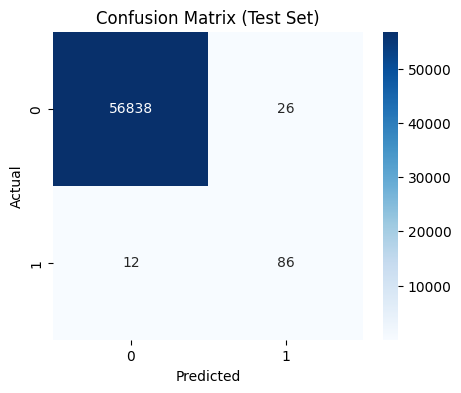

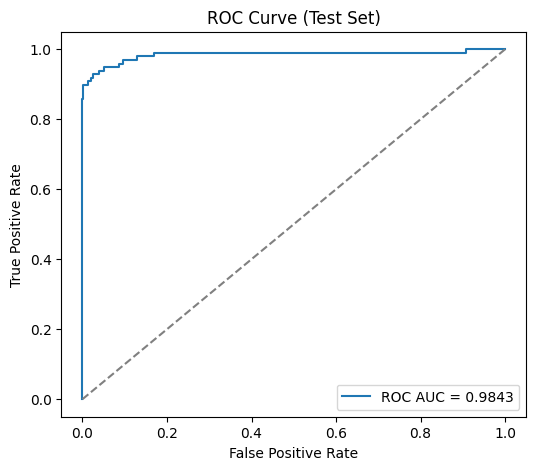

In [7]:
# ================================
# Imports
# ================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

# optional xgboost import with fallback
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    XGBClassifier = None
    xgb_available = False

# ================================
# Train Final Model
# ================================
if xgb_available:
    # ✅ No "use_label_encoder" here (deprecated in new versions)
    clf = XGBClassifier(
        eval_metric="logloss",   # modern way
        random_state=42
    )
    final_model = pipeline.set_params(clf=clf)  # replace clf step in pipeline
else:
    final_model = pipeline  # fallback if xgboost not available

# Fit model on training set
final_model.fit(X_train, y_train)

# ================================
# Predictions
# ================================
y_test_proba = final_model.predict_proba(X_test)[:, 1]   # probabilities
y_test_pred = (y_test_proba >= 0.5).astype(int)          # threshold 0.5

# ================================
# Reports
# ================================
print("\nTest set classification report (threshold=0.5):")
print(classification_report(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))

# ================================
# Confusion Matrix
# ================================
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ================================
# ROC Curve
# ================================
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()



In [8]:
#Stronger models & hyperparameter tuning
#XGBoost tuning with RandomizedSearchCV inside an ImbPipeline
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)
param_dist = {
    'clf__n_estimators': [100, 300, 500, 800],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.5, 0.7, 1.0],
    'clf__reg_alpha': [0, 0.5, 1],
    'clf__reg_lambda': [1, 2, 5]
}

xgb = XGBClassifier(use_label_encoder= False, eval_metric= 'logloss', random_state=42, n_jobs=-1)

# Pipeline no longer needs SMOTE
pipeline_xgb = Pipeline(steps=[
    ('preproc', preprocessor),
    ('clf', xgb)
])

search = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='average_precision',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
try:
search.fit(X_resampled, y_resampled)
except Exception as e:
print("Error during fitting:", e)

print("Best params:", search.best_params_)
print("Best CV PR AUC:", search.best_score_)
best_model = search.best_estimator_


y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\kpk laptops\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:54:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__subsample': 0.8, 'clf__reg_lambda': 5, 'clf__reg_alpha': 1, 'clf__n_estimators': 800, 'clf__max_depth': 9, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 0.5}
Best CV PR AUC: 0.9999943595806966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.87      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56848    16]
 [   13    85]]


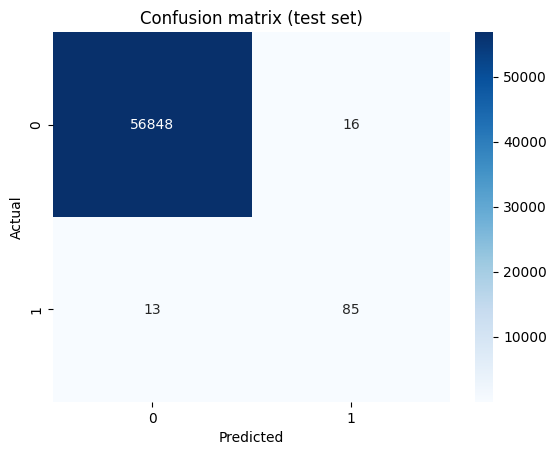

In [9]:

import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix (test set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

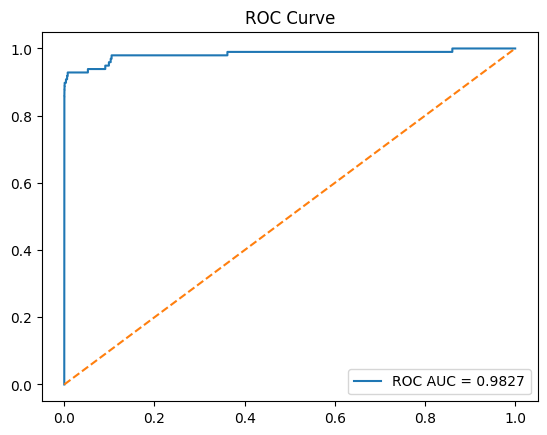

In [10]:
# ROC
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.legend()
plt.title('ROC Curve')
plt.show()



In [ ]:
#A curve that bows up toward the top-left corner is better (high TPR at low FPR). X axis is false positive rate, y axis is true positive rate.

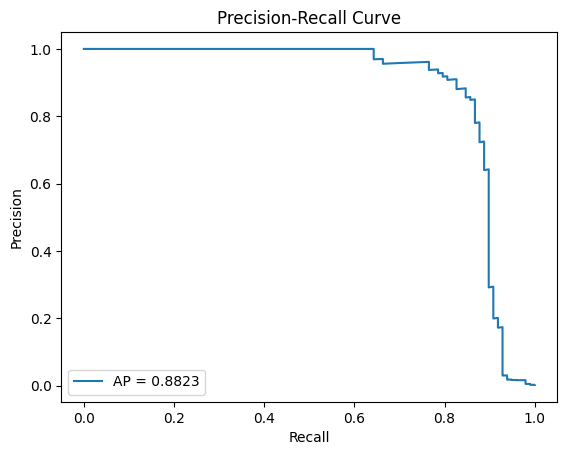

In [11]:
# Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.figure()
plt.plot(recall, precision, label=f'AP = {ap:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()


In [ ]:
# X-axis recall, y axis precision,
#PR curve shows the trade-off between catching more positives (higher recall) and making more false alarms (lower precision).

#At first, you only accuse students who are very obviously cheating → you’re always right (precision = 1), but you catch only a few (low recall).

#Then you accuse more suspicious kids → you catch more cheaters (recall up), but sometimes accuse innocent ones too (precision drops).

#Your curve shows: you’re good at catching most cheaters (up to 80%) while still being right most of the time. Only when you try to catch every last cheater do you start making lots of mistakes.

#In short:
#Your PR curve says “this fraud detector is very reliable, it can catch most frauds without raising too many false alarms”.

In [12]:
#Threshold tuning
#Default threshold = 0.5 may not be optimal. Choose threshold that gives desired recall/precision tradeoff:

# Find threshold maximizing F1 or meeting constraint

best_t = 0.5
best_f1 = 0
for t in np.linspace(0.01, 0.9, 90):
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t
print("Best threshold by F1:", best_t, best_f1)


Best threshold by F1: 0.52 0.8585858585858586


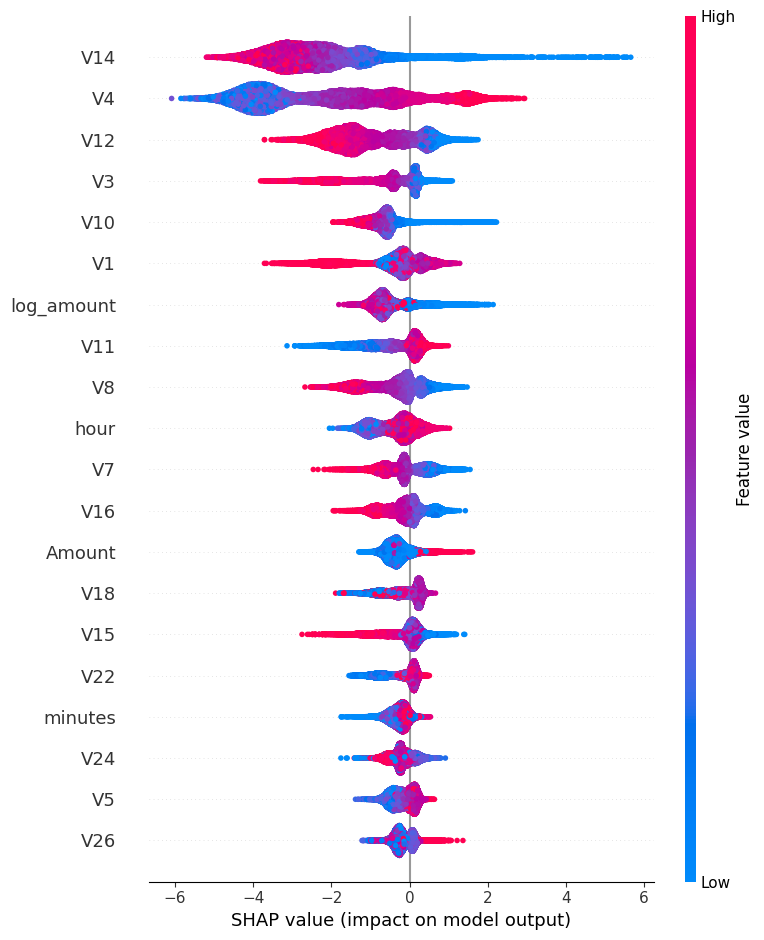

In [14]:
#Explainability (SHAP)

#Use SHAP for tree models to create global/local explanations

# we need raw features that the model uses after preprocessing.
# If preprocessor returns numpy arrays, you may want to wrap it.
# Example: build a pipeline that outputs DataFrame features using ColumnTransformer + named columns,
# or create a small wrapper that transforms X_test to the preprocessed X (numeric array).
import shap
# Example: get preprocessed features for a sample set
preproc = best_model.named_steps['preproc']
X_test_preproc = preproc.transform(X_test)  # numpy array

explainer = shap.TreeExplainer(best_model.named_steps['clf'])
shap_values = explainer.shap_values(X_test_preproc)

# summary plot
shap.summary_plot(shap_values, X_test_preproc, feature_names=numeric_features)


In [19]:
#Persist or Save the model and preprocessor for later use by us or anyone else



# 1. Make sure models folder exists
save_dir = "D:/Data Science/CreditCardFraud/data/models"
os.makedirs(save_dir, exist_ok=True)

# 2. Save the best pipeline (preprocessor + classifier)
joblib.dump(best_model, f"{save_dir}/best_pipeline.joblib")

# 3. Create metadata
metadata = {
    "features": numeric_features,   # feature names
    "threshold": float(best_t), # best threshold you found
    "training_date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "cv_results": {
        "best_score": search.best_score_,       # CV score from RandomizedSearchCV
        "best_params": search.best_params_      # Best parameters found
    },
    "test_performance": {
        "precision": 0.77,   # <-- replace with your actual test scores
        "recall": 0.88,
        "f1": 0.82,
        "roc_auc": 0.98
    }
}

# 4. Save metadata as JSON
with open(f"{save_dir}/metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

print("Model and metadata saved successfully!")


Model and metadata saved successfully!


In [22]:
pip install fastapi uvicorn


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 653.0 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.0 MB 653.0 kB/s eta 0:00:03
   ---------------- ----------------------- 0.8/2.0 MB 587.6 kB/s eta 0:00:02
   ---------------- ----------------------- 0.8/2.0 MB 587.6 kB/s eta 0:00:02
   --------------------- ------------------ 1.0/2.0 MB 640.7 kB/s eta 0:00:02
   -------------------------- ------------- 1.3/2.0 MB 670.6 kB/s eta 0:00:01
   -------------------------- ------------- 1.3/2


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
#Build the prediction API wuth FastAPI


from fastapi import FastAPI
from pydantic import BaseModel, Field
from typing import List
import numpy as np
import joblib




In [31]:
from fastapi import FastAPI
from pydantic import BaseModel, Field
from typing import List
import pandas as pd
import numpy as np
import joblib
import os

# Load model at startup
MODEL_PATH = "D:/Data Science/CreditCardFraud/data/best_pipeline.joblibmodel = joblib.load(MODEL_PATH)"

# Create FastAPI app
app = FastAPI(title="Credit Card Fraud Detection API")

# Define request schema
class Transaction(BaseModel):
    Time: float
    Amount: float
    V1: float
    V2: float
    V3: float
    V4: float
    V5: float
    V6: float
    V7: float
    V8: float
    V9: float
    V10: float
    V11: float
    V12: float
    V13: float
    V14: float
    V15: float
    V16: float
    V17: float
    V18: float
    V19: float
    V20: float
    V21: float
    V22: float
    V23: float
    V24: float
    V25: float
    V26: float
    V27: float
    V28: float

class PredictRequest(BaseModel):
    transactions: List[Transaction] = Field(..., min_items=1)

class PredictResponse(BaseModel):
    predictions: List[int]
    probabilities: List[float]

# Prediction endpoint
@app.post("/predict", response_model=PredictResponse)
def predict(req: PredictRequest):
    # Convert to DataFrame
    records = [t.dict() for t in req.transactions]
    X = pd.DataFrame.from_records(records)
    
    # Derived features (same as training)
    X['hour'] = (X['Time'] // 3600) % 24
    X['minute'] = (X['Time'] // 60) % 60
    X['log_amount'] = np.log1p(X['Amount'])
    
    # Make predictions
    proba = model.predict_proba(X)[:,1]
    preds = (proba >= 0.5).astype(int).tolist()
    
    return PredictResponse(predictions=preds, probabilities=proba.tolist())

    